In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d = "/home/users/lzehetner/data/paper4_aav/HEK_AAV/aav_inh_results_final.xlsx"
data = pd.read_excel(d)

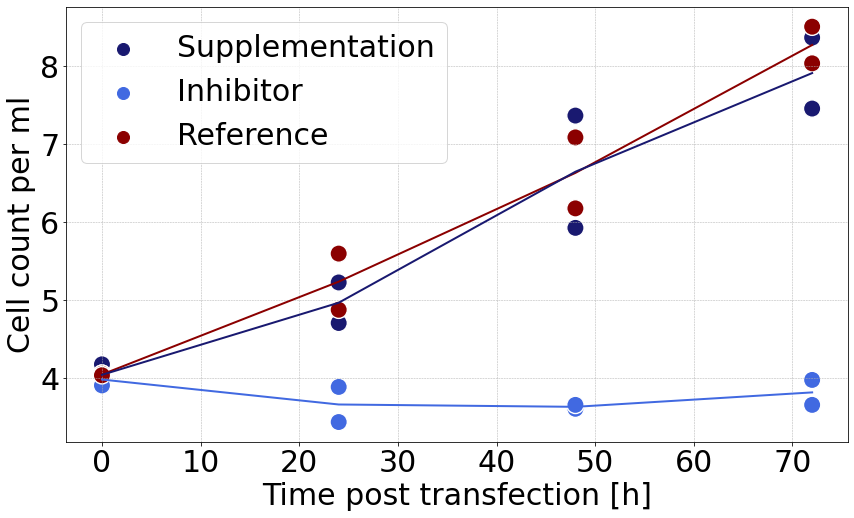

In [19]:
df = data.iloc[:, 1:]

# Extract timepoints and values
timepoints = df.iloc[0, :].astype(float)
values = df.iloc[3, :].astype(float)

# Create the original and combined group arrays
original_group = list(range(1, 7)) * 4
combined_group = original_group.copy()
combined_group = [1 if x == 2 else 3 if x == 4 else 5 if x == 6 else x for x in combined_group]

# Create the DataFrame for plotting
plot_data = pd.DataFrame({'timepoints': timepoints, 'values': values, 'group': combined_group})

# Rename the levels of the group variable
group_labels = {1: 'Supplementation', 3: 'Inhibitor', 5: 'Reference'}
plot_data['group'] = plot_data['group'].map(group_labels)

# Define custom colors
custom_colors = {"Supplementation": "midnightblue", "Inhibitor": "royalblue", "Reference": "darkred"}

mean_data = plot_data.groupby(['timepoints', 'group'], as_index=False).mean()

plt.figure(figsize=(14, 8))

# Plot scatter points
sns.scatterplot(data=plot_data, x='timepoints', y='values', hue='group', palette=custom_colors, s=300)

# Plot lines connecting the mean points for each group
for group, group_data in mean_data.groupby('group'):
    plt.plot(group_data['timepoints'], group_data['values'], color=custom_colors[group], linewidth=2, label='_nolegend_')

# Customization of the plot
plt.xlabel("Time post transfection [h]", fontsize=30)
plt.ylabel("Cell count per ml", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines
plt.legend(title='', title_fontsize='20', fontsize='30', markerscale=2)  # Add legend with custom styling

# Save the figure
plt.savefig('/home/users/lzehetner/data/hek/plots/validation_cc_with_lines.png')
plt.show()

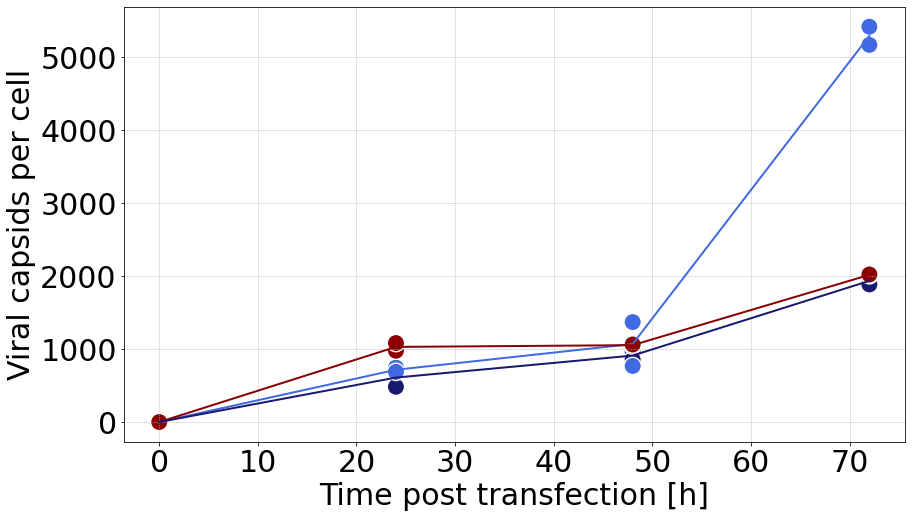

In [18]:
df = data.iloc[:, 1:]

df.loc['capsids_per_cell'] = df.iloc[1, :] / df.iloc[3, :] / 10**6

# Extract timepoints and values
timepoints = df.iloc[0, :].astype(float)
values = df.iloc[4, :].astype(float)

# Create the original and combined group arrays
original_group = list(range(1, 7)) * 4
combined_group = original_group.copy()
combined_group = [1 if x == 2 else 3 if x == 4 else 5 if x == 6 else x for x in combined_group]

# Create the DataFrame for plotting
plot_data = pd.DataFrame({'timepoints': timepoints, 'values': values, 'group': combined_group})

# Rename the levels of the group variable
group_labels = {1: 'Supplementation', 3: 'Inhibitor', 5: 'Reference'}
plot_data['group'] = plot_data['group'].map(group_labels)

# Define custom colors
custom_colors = {"Supplementation": "midnightblue", "Inhibitor": "royalblue", "Reference": "darkred"}

mean_data = plot_data.groupby(['timepoints', 'group'], as_index=False).mean()

plt.figure(figsize=(14, 8))

# Plot scatter points
sns.scatterplot(data=plot_data, x='timepoints', y='values', hue='group', palette=custom_colors, s=300, legend = False)

# Plot lines connecting the mean points for each group
for group, group_data in mean_data.groupby('group'):
    plt.plot(group_data['timepoints'], group_data['values'], color=custom_colors[group], linewidth=2, label='_nolegend_')

# Customization of the plot
plt.xlabel("Time post transfection [h]", fontsize=30)
plt.ylabel("Viral capsids per cell", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines
#plt.legend(title='', title_fontsize='20', fontsize='30', markerscale=2)  # Add legend with custom styling

# Save the figure
plt.savefig('/home/users/lzehetner/data/hek/plots/validation_capsids.png')
plt.show()

In [21]:
data

,Unnamed: 0,Sample1,Sample2,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample13,...,Sample19,Sample22,Sample23,Sample24,Sample25,Sample26,Sample29,Sample30,Sample31,Sample32
0,Timepoint,0.00,0.00,0.00,0.00,0.00,0.00,2.400000e+01,2.400000e+01,2.400000e+01,...,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01
1,VC (per ml),0.00,0.00,0.00,0.00,0.00,0.00,3.844713e+09,2.274992e+09,2.563000e+09,...,4.943000e+09,2.812000e+09,7.398000e+09,6.566000e+09,1.659000e+10,1.406000e+10,1.982000e+10,2.056000e+10,1.711000e+10,1.625000e+10
2,VG (per ml),0.00,0.00,0.00,0.00,0.00,0.00,1.999000e+09,1.538000e+09,1.131555e+09,...,2.794177e+09,1.517542e+09,4.510246e+09,4.074088e+09,1.000160e+10,9.175643e+09,1.941252e+09,1.715980e+09,9.790383e+09,1.034861e+10
3,CC (10^6/ml),4.18,3.91,3.91,4.06,4.06,4.04,5.230000e+00,4.710000e+00,3.440000e+00,...,3.610000e+00,3.660000e+00,7.090000e+00,6.180000e+00,8.370000e+00,7.460000e+00,3.660000e+00,3.980000e+00,8.510000e+00,8.040000e+00


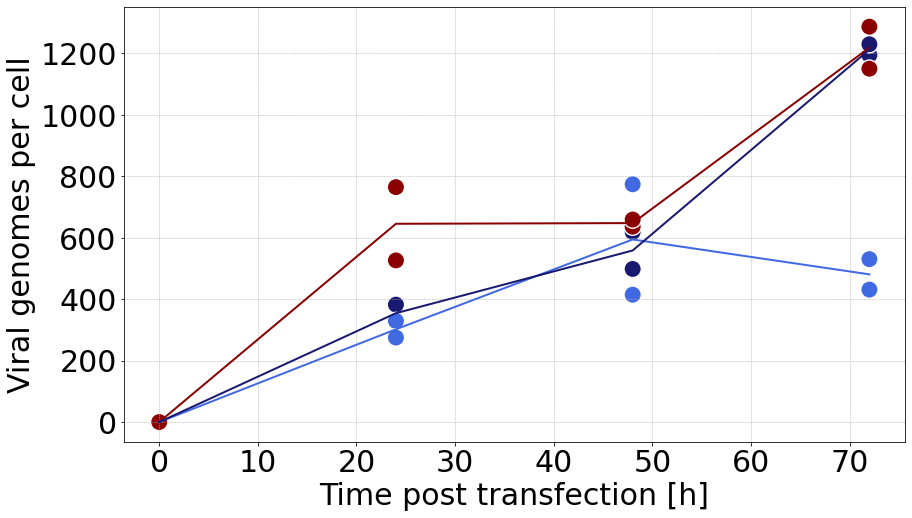

In [16]:
df = data.iloc[:, 1:]

df.loc['genomes_per_cell'] = df.iloc[2, :] / df.iloc[3, :] / 10**6

# Extract timepoints and values
timepoints = df.iloc[0, :].astype(float)
values = df.iloc[4, :].astype(float)

# Create the original and combined group arrays
original_group = list(range(1, 7)) * 4
combined_group = original_group.copy()
combined_group = [1 if x == 2 else 3 if x == 4 else 5 if x == 6 else x for x in combined_group]

# Create the DataFrame for plotting
plot_data = pd.DataFrame({'timepoints': timepoints, 'values': values, 'group': combined_group})

# Rename the levels of the group variable
group_labels = {1: 'Supplementation', 3: 'Inhibitor', 5: 'Reference'}
plot_data['group'] = plot_data['group'].map(group_labels)

# Define custom colors
custom_colors = {"Supplementation": "midnightblue", "Inhibitor": "royalblue", "Reference": "darkred"}

mean_data = plot_data.groupby(['timepoints', 'group'], as_index=False).mean()

plt.figure(figsize=(14, 8))

# Plot scatter points
sns.scatterplot(data=plot_data, x='timepoints', y='values', hue='group', palette=custom_colors, s=300, legend=False)

# Plot lines connecting the mean points for each group
for group, group_data in mean_data.groupby('group'):
    plt.plot(group_data['timepoints'], group_data['values'], color=custom_colors[group], linewidth=2, label='_nolegend_')

# Customization of the plot
plt.xlabel("Time post transfection [h]", fontsize=30)
plt.ylabel("Viral genomes per cell", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines

# Save the figure
plt.savefig('/home/users/lzehetner/data/hek/plots/validation_genomes.png')
plt.show()